# Additional Visualizations

## General SOTA DP-Performance Graph
Display performance of non-adapted SOTA models under DP, compared to their performance without DP.

In [1]:
import numpy as np
import pandas as pd
from typing import List
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: automate fetching data

### Model - Final Benchmark ###
# perf data
dp_performances = np.array([0.673, 0.706, 0.738, 0.662, 0.655])
nodp_performances = np.array([0.764, 0.807, 0.821, 0.831, 0.725])

# grad data (GGN of best run)
dp_GGNs = np.array([11.439, 19.847, 20.484, 19.576, 10.312])
nodp_GGNs = np.array([3.260, 2.348, 3.293, 3.160, 5.241])

# search data (params of best DP-runs)
best_L2_clips = np.array([14.296, 3.826, 6.829, 13.887, 17.955])
best_epochs = np.array([84, 110, 84, 179, 149])

# model meta
model_names_benchmark = np.array(["B_RM_MXP_GN_SELU_W80D10", "B_DM_MXP_GN_SELU_W80D10", "B_DM_MXP_GN_SELU_W80D50", 
                             "B_DM_MXP_GN_SELU_W80D80", "B_DenseNet121_GN"])
model_sizes = np.array([777, 601, 3400, 8200, 7000]) # in K

# Create Pandas DataFrame for all experiments
runs_df = pd.DataFrame(
    {
        "model":model_names_benchmark,
        "size":model_sizes, 
        "dp_performance":dp_performances, 
        "nodp_performance":nodp_performances, 
        "dp_GGN":dp_GGNs, 
        "nodp_GGN":nodp_GGNs,  
        "best_L2":best_L2_clips, 
        "best_epoch":best_epochs,
        "SOTA":[False]*len(model_names_benchmark),
    },
)

### Model - SOTA ###
# perf data
dp_performances = np.array([0.266, 0.410, 0.447, 0.393, 0.423, 0.607, 0.561, 0.455, 0.462, 0.419, 0.418, 0.574, 
                            0.419, 0.418, 0.396, 0.363, 0.497, 0.478, 0.474, 0.482, 0.480, 0.564, 0.563, 0.547, 
                            0.466, 0.559, 0.251, 0.278, 0.099])
nodp_performances = np.array([0.775, 0.792, 0.716, 0.731, 0.665, 0.725, 0.720, 0.689, 0.714, 0.664, 0.573, 0.720, 
                            0.664, 0.660, 0.623, 0.568, 0.815, 0.784, 0.758, 0.736, 0.808, 0.713, 0.708, 0.664, 
                            0.724, 0.725, 0.783, 0.711, 0.099])

# grad data (GGN of best run)
dp_GGNs = np.array([9.628, 5.646, 16.303, 27.168, 32.376, 13.590, 12.229, 24.032, 15.785, 8.488, 9.139, 11.044, 
                    8.488, 7.302, 6.250, 4.638, 5.068, 4.969, 4.478, 5.367, 5.939, 8.431, 7.843, 5.737, 4.742, 10.533, 
                    3.074, 2.055, 0.082])
nodp_GGNs = np.array([3.787, 0.774, 6.375, 4.919, 6.505, 5.241, 5.486, 7.790, 5.007, 7.418, 6.929, 5.386,
                    7.418, 7.278, 6.700, 5.040, 0.380, 0.836, 1.004, 0.981, 0.465, 5.609, 5.469, 5.740, 1.099, 5.241, 
                    0.249, 0.396, 0.165])

# search data (params of best DP-runs)
best_L2_clips = np.array([0.193, 9.796, 7.557, 2.294, 1.963, 5.396, 7.788, 4.825, 6.888, 8.709, 8.667, 8.297,
                          8.709, 8.295, 7.759, 9.946, 9.957, 9.824, 9.464, 7.659, 8.300, 7.293, 7.158, 9.938, 
                          9.857, 8.420, 6.654, 8.884, 7.493])
best_epochs = np.array([14, 25, 25, 25, 25, 14, 14, 25, 25, 25, 25, 25, 
                        25, 25, 14, 25, 25, 25, 25, 25, 14, 25, 25, 25, 25, 25, 14, 14, 16])

# model meta
model_names_sota = np.array(["S_VGG11_GN", "S_ResNet18_GN", "S_ResNet50_GN", "S_WideResNet50_GN", "S_ResNet152_GN", 
                            "S_DenseNet121_GN", "S_DenseNet201_GN", "S_GoogLeNet_GN", "S_Xception_GN", "S_MobileNetV1_x100_GN", 
                            "S_EfficientNetB0_GN", "S_DenseNet169_GN", "S_MobileNetV1_GN", "S_MobileNetV1_x075_GN", 
                            "S_MobileNetV1_x050_GN", "S_MobileNetV1_x025_GN", "S_ResNet18_GN_PyCV", "S_ResNet18_x075_GN", 
                            "S_ResNet18_x050_GN", "S_ResNet18_x025_GN", "S_ResNet18_LN", "S_DenseNet121_x075_GN", 
                            "S_DenseNet121_x050_GN", "S_DenseNet121_x025_GN", "S_ResNet18_x025_LN", 
                            "S_DenseNet121_LN", "S_ResNet18_IN", "S_ResNet18_x025_IN", "S_DenseNet121_IN"])
model_sizes = np.array([128000, 11200, 23500, 66900, 58200, 7000, 18100, 10000, 20800, 3200, 4000, 12500, 
                        3200, 1800, 839, 223, 11200, 8000, 5300, 3400, 11200, 3900, 1800, 454, 3400, 7000, 
                        11200, 3400, 6900]) # in K

# Create Pandas DataFrame for all experiments
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_sota,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs,  
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[True]*len(model_names_sota),
        },
    )
)

### Model - DEPTH ###
# perf data
dp_performances = np.array([0.493, 0.467, 0.442, 0.481, 0.439, 0.397, 0.344])
nodp_performances = np.array([0.658, 0.665, 0.618, 0.337, 0.598, 0.099, 0.099])

# grad data (GGN of best run)
dp_GGNs = np.array([6.094, 8.759, 9.960, 10.224, 11.094, 13.099, 12.930])
nodp_GGNs = np.array([4.519, 6.052, 6.691, 1.505, 7.292, 0.172, 0.176])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.545, 9.951, 9.978, 9.819, 9.610, 9.983, 9.971])
best_epochs = np.array([25, 25, 25, 25, 25, 14, 25])

# model meta
model_names_depth = np.array(["Depth D10", "Depth D20", "Depth D30", "Depth D50", "Depth D40", 
                              "Depth D60", "Depth D80"])
model_sizes = np.array([101, 104, 107, 112, 110, 115, 121]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_depth,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_depth),
        },
    )
)

### Model - WIDTH ###
# perf data
dp_performances = np.array([0.493, 0.497, 0.491, 0.506, 0.493, 0.496])
nodp_performances = np.array([0.658, 0.700, 0.706, 0.729, 0.756, 0.749])

# grad data (GGN of best run)
dp_GGNs = np.array([6.094, 6.483, 6.506, 7.355, 7.903, 8.398])
nodp_GGNs = np.array([4.519, 3.906, 4.199, 3.272, 2.537, 3.074])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.545, 9.829, 9.573, 9.766, 9.207, 9.992])
best_epochs = np.array([25, 25, 14, 25, 25, 14])

# model meta
model_names_width = np.array(["Width W10", "Width W14", "Width W18", "Width W26", 
                              "Width W38", "Width W50"])
model_sizes = np.array([101, 127, 153, 210, 297, 392]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_width,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_width),
        },
    )
)

### Model - SKIP 1 | Residual Model MXP ###
# perf data
dp_performances = np.array([0.487, 0.456, 0.464, 0.475, 0.427, 0.420, 0.511, 0.493, 0.483, 0.534, 0.504, 
                            0.494, 0.517, 0.479, 0.451])
nodp_performances = np.array([0.689, 0.648, 0.612, 0.699, 0.625, 0.716, 0.697, 0.711, 0.721, 0.739, 0.621, 
                            0.605, 0.729, 0.747, 0.742])

# grad data (GGN of best run)
dp_GGNs = np.array([7.941, 10.262, 8.571, 15.335, 19.654, 61.571, 18.341, 30.768, 34.359, 13.166, 6.398, 
                    9.219, 23.911, 39.888, 71.841])
nodp_GGNs = np.array([4.505, 3.926, 4.013, 4.813, 5.179, 7.124, 4.649, 5.204, 5.540, 4.112, 5.932, 
                    6.192, 3.960, 4.502, 5.046])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.984, 9.818, 9.884, 8.573, 7.379, 3.911, 7.992, 5.115, 4.336, 9.063, 9.941, 
                        9.824, 4.810, 4.524, 3.674])
best_epochs = np.array([25, 14, 25, 14, 14, 25, 25, 16, 25, 25, 25, 25, 25, 14, 17])

# model meta
model_names_res = np.array(["W10D20 Base Model Skip", "W10D80 Base Model Skip", "W10D10 Residual Model MXP", 
                        "W50D10 Residual Model MXP", "W10D80 Residual Model MXP", "W50D80 Residual Model MXP", 
                        "W50D20 Residual Model MXP", "W50D40 Residual Model MXP", "W50D50 Residual Model MXP", 
                        "W80D10 Residual Model MXP", "W10D20 Residual Model MXP", "W10D40 Residual Model MXP", 
                        "W80D20 Residual Model MXP", "W80D40 Residual Model MXP", "W80D80 Residual Model MXP"])
model_sizes = np.array([104, 121, 103, 447, 143, 1500, 591, 879, 1000, 776, 109, 120, 1100, 1900, 3400]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_res,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_res),
        },
    )
)

### Model - SKIP 2 | Dense Model MXP ###
# perf data
dp_performances = np.array([0.481, 0.519, 0.594, 0.572, 0.497, 0.497, 0.569, 0.588, 0.571, 0.555, 0.567, 
                            0.582, 0.558, 0.324])
nodp_performances = np.array([0.653, 0.744, 0.798, 0.750, 0.731, 0.791, 0.839, 0.800, 0.834, 0.709, 0.850,
                              0.791, 0.841, 0.828])

# grad data (GGN of best run)
dp_GGNs = np.array([6.656, 9.909, 7.883, 10.600, 19.715, 53.090, 34.975, 11.401, 24.626, 6.409, 54.421, 
                    6.409, 45.040, 5.185])
nodp_GGNs = np.array([4.074, 4.228, 2.848, 4.654, 4.848, 5.073, 2.278, 2.644, 1.096, 4.609, 1.923, 
                    4.609, 2.052, 2.699])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.893, 9.377, 9.430, 8.930, 8.522, 4.777, 4.521, 9.039, 5.024, 9.997, 3.550, 
                          9.997, 3.929, 0.424])
best_epochs = np.array([25, 14, 25, 25, 14, 14, 25, 25, 25, 25, 25, 25, 16, 25])

# model meta
model_names_dense = np.array(["W10D10 Dense Model MXP", "W50D10 Dense Model MXP", "W80D10 Dense Model MXP",
                        "W10D50 Dense Model MXP", "W10D80 Dense Model MXP", "W50D80 Dense Model MXP", 
                        "W80D50 Dense Model MXP", "W50D20 Dense Model MXP", "W50D50 Dense Model MXP", 
                        "W10D20 Dense Model MXP", "W80D80 Dense Model MXP", "W120D10 Dense Model MXP", 
                        "W120D50 Dense Model MXP", "W120D80 Dense Model MXP"])
model_sizes = np.array([100, 379, 600, 145, 222, 3400, 3400, 498, 1500, 106, 8200, 912, 7200, 18100]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_dense,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_dense),
        },
    )
)

### Model - LN ###
# perf data
dp_performances = np.array([0.506, 0.506, 0.460, 0.483])
nodp_performances = np.array([0.645, 0.739, 0.622, 0.732])

# grad data (GGN of best run)
dp_GGNs = np.array([4.860, 6.129, 7.326, 12.054])
nodp_GGNs = np.array([4.580, 2.217, 4.843, 2.517])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.974, 8.088, 8.963, 6.414])
best_epochs = np.array([25, 25, 14, 25])

# model meta
model_names_LN = np.array(["W10D10 Residual Model LN", "W50D10 Residual Model LN", 
                        "W10D80 Residual Model LN", "W50D80 Residual Model LN"])
model_sizes = np.array([103, 447, 144, 1500]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_LN,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_LN),
        },
    )
)

### Model - IN ###
# perf data
dp_performances = np.array([0.426, 0.430, 0.362, 0.338])
nodp_performances = np.array([0.608, 0.745, 0.634, 0.762])

# grad data (GGN of best run)
dp_GGNs = np.array([4.352, 6.079, 9.248, 12.056])
nodp_GGNs = np.array([4.117, 2.727, 5.156, 2.997])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.971, 6.410, 6.434, 2.811])
best_epochs = np.array([14, 25, 14, 25])

# model meta
model_names_IN = np.array(["W10D10 Residual Model IN", "W50D10 Residual Model IN", 
                        "W10D80 Residual Model IN", "W50D80 Residual Model IN"])
model_sizes = np.array([103, 447, 143, 1500]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_IN,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_IN),
        },
    )
)

### Model - GN ###
# perf data
dp_performances = np.array([0.437, 0.469, 0.515, 0.458, 0.370, 0.432, 0.505])
nodp_performances = np.array([0.632, 0.755, 0.741, 0.641, 0.662, 0.762, 0.758])

# grad data (GGN of best run)
dp_GGNs = np.array([4.889, 6.646, 7.384, 6.734, 8.404, 14.473, 13.802])
nodp_GGNs = np.array([4.144, 1.985, 1.197, 4.422, 4.480, 1.284, 2.105])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.099, 6.301, 5.104, 6.250, 5.272, 7.163, 4.619])
best_epochs = np.array([25, 14, 25, 25, 25, 14, 25])

# model meta
model_names_GN = np.array(["W10D10 Residual Model GN", "W50D10 Residual Model GN", 
                        "W80D10 Residual Model GN", "W10D50 Residual Model GN",
                        "W10D80 Residual Model GN", "W50D80 Residual Model GN", 
                        "W80D50 Residual Model GN"])
model_sizes = np.array([103, 447, 777, 126, 144, 1500, 2300]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_GN,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_GN),
        },
    )
)

### Model - MXP_GN ###
# perf data
dp_performances = np.array([0.451, 0.538, 0.322, 0.490])
nodp_performances = np.array([0.573, 0.732, 0.590, 0.716])

# grad data (GGN of best run)
dp_GGNs = np.array([4.440, 7.721, 10.723, 11.417])
nodp_GGNs = np.array([4.822, 3.150, 5.735, 3.404])

# search data (params of best DP-runs)
best_L2_clips = np.array([8.143, 6.868, 6.233, 8.272])
best_epochs = np.array([25, 25, 25, 14])

# model meta
model_names_MXP_GN = np.array(["W10D10 Residual Model MXP_GN", "W50D10 Residual Model MXP_GN", 
                        "W10D80 Residual Model MXP_GN", "W50D80 Residual Model MXP_GN"])
model_sizes = np.array([103, 447, 144, 1500]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_MXP_GN,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_MXP_GN),
        },
    )
)
### Model - Base Model Discussion ###
# perf data
dp_performances = np.array([0.493, 0.496, 0.578, 0.554, 0.562, 0.467, 0.344, 0.512, 0.534, 0.496, 0.481])
nodp_performances = np.array([0.658, 0.749, 0.785, 0.656, 0.769, 0.665, 0.099, 0.099, 0.752, 0.099, 0.337])

# grad data (GGN of best run)
dp_GGNs = np.array([6.094, 8.398, 11.266, 24.093, 7.287, 8.759, 12.930, 34.211, 34.367, 37.230, 10.224])
nodp_GGNs = np.array([4.519, 3.074, 3.029, 5.014, 2.341, 6.052, 0.176, 0.175, 6.523, 0.175, 1.505])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.545, 9.992, 9.895, 6.877, 9.536, 9.951, 9.971, 6.056, 7.001, 4.214, 9.819])
best_epochs = np.array([25, 14, 25, 25, 25, 25, 25, 14, 25, 25, 25])

# model meta
model_names_base_models = np.array(["W10D10 Base Model MXP", "W50D10 Base Model MXP", "W50D20 Base Model MXP", 
                                    "W50D50 Base Model MXP", "W80D10 Base Model MXP", "W10D20 Base Model MXP", 
                                    "W10D80 Base Model MXP", "W50D80 Base Model MXP", "W80D50 Base Model MXP", 
                                    "W80D80 Base Model MXP", "W10D50 Base Model MXP"])
model_sizes = np.array([101, 392, 464, 680, 634, 104, 121, 896, 1400, 1900, 112]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_base_models,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_base_models),
        },
    )
)
# to index directly with model names (model names can be returned with runs_df.index)
runs_df.set_index("model", inplace=True)

## Setup for model selection
The next cells are made for easier model selection and comparison

In [2]:
def select_models(all_models: List[str], key_words: List[str], separator: str = " ", all_true: int = False):
    """
        Takes in a list model names, words to filter by, and a seperator 
        to seperate the words in the model names.
        Returns a boolean list, returning True if a model contained 
        one of the words in key_words.
    """
    selected_models = []
    keys_left = len(key_words)
    for model in all_models:
        for word in model.split(separator):
            if word in key_words:
                if all_true: 
                    keys_left -= 1
                else: 
                    keys_left = 0
        if not keys_left:
            keys_left = len(key_words) # reset key count
            selected_models.append(True)
        else: 
            # no True was appended (no break was called)
            keys_left = len(key_words) # reset key count
            selected_models.append(False)
    return selected_models

In [3]:
import re
import numpy as np

all_models = np.concatenate(
    [
        model_names_benchmark,
        model_names_sota,
        model_names_depth, 
        model_names_width,
        model_names_res,
        model_names_dense,
        model_names_LN, 
        model_names_IN, 
        model_names_GN, 
        model_names_MXP_GN, 
        model_names_base_models,
    ]
)

# select columns to compare
# ['size', 'dp_performance', 'nodp_performance', 'dp_GGN', 'nodp_GGN', 'best_L2', 'best_epoch']
selected_columns = ['size', 'dp_performance', 'nodp_performance', 'dp_GGN', 'nodp_GGN', 'best_L2', 'best_epoch']
runs_df = runs_df[selected_columns]

# add extra columns if wanted
runs_df["perf_ratio"] = runs_df["dp_performance"]/runs_df["nodp_performance"]
runs_df["ggn_ratio"] = runs_df["dp_GGN"]/runs_df["nodp_GGN"]
width_pattern = re.compile('W([0-9][0-9]+)')
depth_pattern = re.compile('D([0-9][0-9]+)')
# get second capture group (only the number)
runs_df["width"] = [
    float(re.search(width_pattern, name).group(1))/10 
    if re.search(width_pattern, name) else -1
    for name in runs_df.reset_index()["model"]
]
runs_df["depth"] = [
    float(re.search(depth_pattern, name).group(1))/10
    if re.search(depth_pattern, name) else -1
    for name in runs_df.reset_index()["model"]
]
# to preserve the '-1': np.sign(runs_df["depth"]).tolist()
runs_df["wd_ratio"] = runs_df["width"]/runs_df["depth"]*np.sign(runs_df["depth"]).tolist()

# possible groupings
width_models = runs_df.loc[select_models(all_models, ["Width", "W50D10", "W50D80"])]
depth_models = runs_df.loc[select_models(all_models, ["Depth", "W10D80", "W50D80"])]

small_models = runs_df.loc[select_models(all_models, ["W10D10"])]
wide_models = runs_df.loc[select_models(all_models, ["W50D10"])]
deep_models = runs_df.loc[select_models(all_models, ["W10D80"])]
large_models = runs_df.loc[select_models(all_models, ["W50D80"])]

LN_models = runs_df.loc[select_models(all_models, ["LN"])]
IN_models = runs_df.loc[select_models(all_models, ["IN"])]
GN_models = runs_df.loc[select_models(all_models, ["GN"])]
MXP_GN_models = runs_df.loc[select_models(all_models, ["MXP_GN"])]
MXP_models = runs_df.loc[select_models(all_models, ["MXP"])]

base_models = runs_df.loc[select_models(all_models, ["Base", "Depth", "Width"])]
residual_models = runs_df.loc[select_models(all_models, ["Residual"])]
dense_models = runs_df.loc[select_models(all_models, ["Dense"])]

base_models_MXP = runs_df.loc[select_models(all_models, ["Base", "MXP"], all_true=True)]
residual_models_MXP = runs_df.loc[select_models(all_models, ["Residual", "MXP"], all_true=True)]
dense_models_MXP = runs_df.loc[select_models(all_models, ["Dense", "MXP"], all_true=True)]

# special groups for better comparability (for comparison graphs)
MXP_models_only = MXP_models.loc[
    MXP_models.index.isin(
        [
            "W10D10 Residual Model MXP", 
            "W50D10 Residual Model MXP", 
            "W10D80 Residual Model MXP", 
            "W50D80 Residual Model MXP"
        ]
    )
]

GN_models_only = runs_df.loc[
    runs_df.index.isin(
        [
            "W10D10 Residual Model GN", 
            "W50D10 Residual Model GN", 
            "W10D80 Residual Model GN", 
            "W50D80 Residual Model GN",
            "S_ResNet18_GN", 
            "S_DenseNet121_GN",
        ]
    )
]

LN_models_only = runs_df.loc[
    runs_df.index.isin(
        [
            "W10D10 Residual Model LN", 
            "W50D10 Residual Model LN", 
            "W10D80 Residual Model LN", 
            "W50D80 Residual Model LN",
            "S_ResNet18_LN", 
            "S_DenseNet121_LN",
        ]
    )
]

IN_models_only = runs_df.loc[
    runs_df.index.isin(
        [
            "W10D10 Residual Model IN", 
            "W50D10 Residual Model IN", 
            "W10D80 Residual Model IN", 
            "W50D80 Residual Model IN",
            "S_ResNet18_IN",
            "S_DenseNet121_IN",
        ]
    )
]

considered_widths = [1.0, 5.0, 8.0]
considered_depths = [1.0, 5.0, 8.0]

base_models_mxp_only = base_models_MXP.loc[
    base_models_MXP.width.isin(considered_widths) & 
    base_models_MXP.depth.isin(considered_depths)
]

residual_models_mxp_only = residual_models_MXP.loc[
    residual_models_MXP.width.isin(considered_widths) & 
    residual_models_MXP.depth.isin([1.0, 2.0, 4.0]) # because of skip-depth 2.0
]

dense_models_mxp_only = dense_models_MXP.loc[
    dense_models_MXP.width.isin(considered_widths) & 
    dense_models_MXP.depth.isin(considered_depths)
]

# SOTA
sota_index = np.array(select_models(all_models, "S", separator="_"))
sota_models = runs_df.loc[sota_index]
non_sota_models = runs_df.loc[np.invert(sota_index)]

sota_models_GN = runs_df.loc[select_models(all_models, ["S", "GN"], separator="_", all_true=True)]

# SOTA adaptations
# SOTA depth adaptation
DenseNets_GN_depth = runs_df.loc[
    runs_df.index.isin(
        [
            "S_DenseNet121_GN", 
            "S_DenseNet169_GN", 
            "S_DenseNet201_GN", 
        ]
    )
]

ResNets_GN_depth = runs_df.loc[
    runs_df.index.isin(
        [
            "S_ResNet18_GN", 
            "S_ResNet50_GN", 
            "S_ResNet152_GN", 
        ]
    )
]

# SOTA width adaptation
DenseNets_GN_width = runs_df.loc[
    runs_df.index.isin(
        [
            "S_DenseNet121_x025_GN",
            "S_DenseNet121_x050_GN",
            "S_DenseNet121_x075_GN", 
            "S_DenseNet121_GN", 
        ]
    )
]

ResNets_GN_width = runs_df.loc[
    runs_df.index.isin(
        [
            "S_ResNet18_x025_GN",
            "S_ResNet18_x050_GN",
            "S_ResNet18_x075_GN", 
            "S_ResNet18_GN_PyCV", 
        ]
    )
]

MobileNets_GN_width = runs_df.loc[
    runs_df.index.isin(
        [
            "S_MobileNetV1_x025_GN",
            "S_MobileNetV1_x050_GN",
            "S_MobileNetV1_x075_GN", 
            "S_MobileNetV1_GN", 
        ]
    )
]

# SOTA normalization adaptation
DenseNets_norm = runs_df.loc[
    runs_df.index.isin(
        [
            "S_DenseNet121_GN",
            "S_DenseNet121_LN",
            "S_DenseNet121_IN",
        ]
    )
]

ResNets_norm = runs_df.loc[
    runs_df.index.isin(
        [
            "S_ResNet18_GN_PyCV",
            "S_ResNet18_LN",
            "S_ResNet18_IN", 
        ]
    )
]

# Benchmark
benchmark_models = runs_df.loc[select_models(all_models, "B", separator="_")]

## Single Plots
This section is used to plot a list of models, without specific comparisons of different model groups.

In [4]:
# set experiments to visualize

# to visualize all models - if selected_df=runs_df set select_all for better visualizations
select_all = False

# select models
selected_df = base_models_MXP

# save figures
save_figures = False

# print to check
#selected_df.sort_values("dp_performance", ascending=False)

## Overview and Comparison Plots
[JUMP TO VISUALIZE TO DIRECT VISUALIZATION WITHOUT EXTRA COMPARISON]
<br>
<br>
This section compares different groups of models and visualizes them.

Excluded models: [['W10D80 Base Model MXP', 'W50D80 Base Model MXP', 'W80D80 Base Model MXP']]


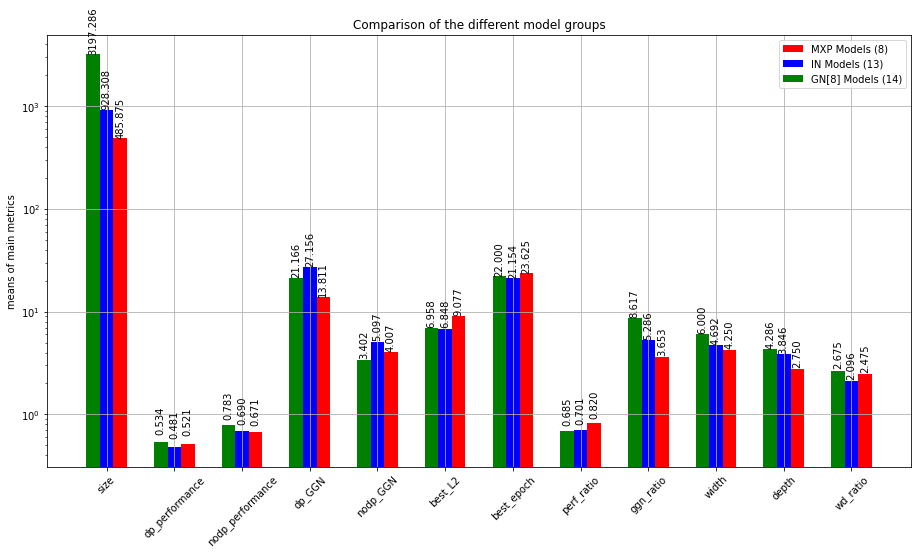

In [5]:
# plot a comparison of the main values (see above cells for options)
selected_models = [base_models_MXP, residual_models_MXP, dense_models_MXP]

# exlucde all models that didn't train in nodp case -- handled separately in stabilizing effect section
excluded_models = []
for i, model in enumerate(selected_models): 
    if len(model[model["nodp_performance"]<=0.1]): 
        excluded_models.append(model[model["nodp_performance"]<=0.1].index.tolist())
        selected_models[i] = model[model["nodp_performance"]>0.1]
print(f"Excluded models: {excluded_models}")

selected_names = [
    f"MXP Models ({len(selected_models[0])})", 
    f"IN Models ({len(selected_models[1])})", 
    f"GN[8] Models ({len(selected_models[2])})", 
]

# generic params
colors = ["red", "blue", "green", "orange", "pink"]
title = "Comparison of the different model groups"
ylabel = "means of main metrics"
with_numbers = True
width = 0.2

starting_points = [
    (len(selected_models)-1)/2-i
    for i in range(len(selected_models))
]
x_axis = np.arange(len(runs_df.columns))

fig = plt.figure(figsize=(12,6))
axis = fig.add_axes([0,0,1,1])

for i, model in enumerate(selected_models): 
    axis.bar(
        x_axis+starting_points[i]*width, 
        model.mean(), 
        width, 
        label=selected_names[i], 
        color=colors[i],
    )
    if with_numbers:
        for j, pos in enumerate(x_axis):
            number = model.mean().tolist()[j]
            axis.text(
                pos+starting_points[i]*width, 
                number+0.1, 
                "%.3f"%number, 
                ha="center",
                va="bottom", 
                rotation=90,
            )

axis.set_ylabel(ylabel)
axis.set_title(title)

plt.xticks(x_axis, runs_df.columns, rotation=45)
plt.yscale("log")
plt.legend()
plt.grid()
fig.savefig('figures/LN_IN_GN_MXPGN_overview.pdf', bbox_inches='tight') if save_figures else plt.show()

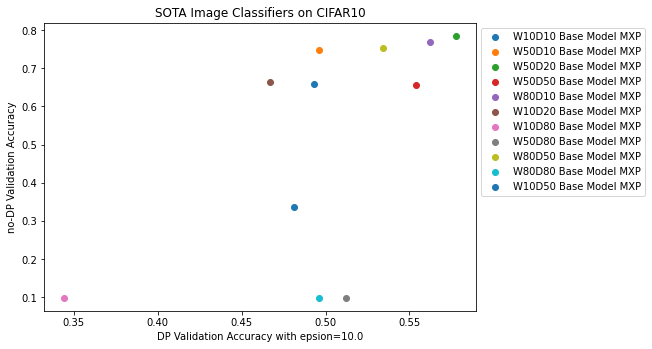

In [6]:
# Plot Nr. 1a - Scatter Plot DP/no-DP SOTA performances
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0, 0, 1, 1])

for i in range(len(selected_df)): 
    axis.scatter(
        selected_df["dp_performance"][i], 
        selected_df["nodp_performance"][i], 
        label=selected_df.index[i]
    )

axis.legend(bbox_to_anchor=(1,1),loc="best")
axis.set_xlabel("DP Validation Accuracy with epsion=10.0")
axis.set_ylabel("no-DP Validation Accuracy")
axis.set_title("SOTA Image Classifiers on CIFAR10")

fig.savefig('figures/sota_scatter.pdf', bbox_inches='tight') if save_figures else plt.show()
#plt.scatter(dp_performances, nodp_performances, c='g')

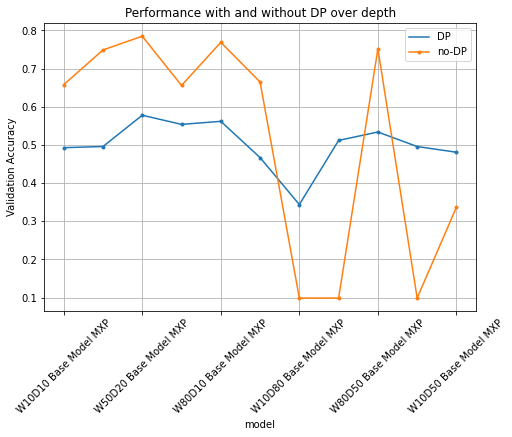

In [7]:
# Plot Nr. 1b - Performance w/ and w/o DP over parameter
#ResNets_norm, DenseNets_norm, MobileNets_GN_width, ResNets_GN_width, DenseNets_GN_width, ResNets_GN_depth
#selected_df = ResNets_GN_depth

fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
# axis.set_ylim((0,1))

# sort values 
# selected_df = selected_df.sort_values("model")

# reset_index() because we use the model as index for df
# selected_df.reset_index().plot.scatter("model", "dp_performance", ax=axis, rot=45)

selected_df.reset_index().plot("model", "dp_performance", ax=axis, label="DP", rot=45, style=".-")
selected_df.reset_index().plot("model", "nodp_performance", ax=axis, label="no-DP", rot=45, style=".-")
# selected_df.reset_index().plot("model", "dp_GGN", ax=axis, label="DP", rot=45, style=".-")
# selected_df.reset_index().plot("model", "nodp_GGN", ax=axis, label="no-DP", rot=45, style=".-")

axis.set_title("Performance with and without DP over depth")
axis.set_ylabel("Validation Accuracy")
plt.grid()
# plt.yscale("log")

fig.savefig('figures/valacc_over_depths_rm.pdf', bbox_inches='tight') if save_figures else plt.show()

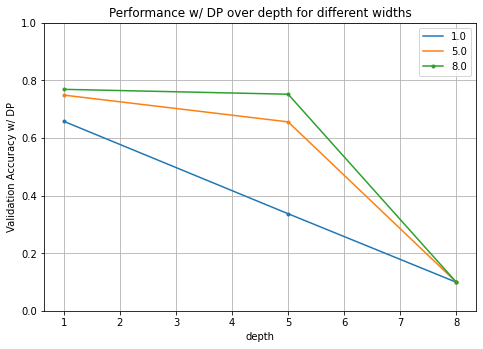

In [8]:
# Plot Nr. 1c - Mean Performance w/ and w/o DP over parameter
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.set_ylim((0,1))

# mean() to average over width, depth for different normalizations
selected_df[selected_df.width.isin([1.0, 5.0, 8.0]) & selected_df.depth.isin([1.0, 5.0, 8.0])].groupby(
    ["depth", "width"]
).mean().reset_index().set_index("depth").groupby("width")["nodp_performance"].plot(legend=True, style=".-")

axis.set_title("Performance w/ DP over depth for different widths")
axis.set_ylabel("Validation Accuracy w/ DP")
plt.grid()

fig.savefig('figures/perf_over_depth_width_BM_noDP.pdf', bbox_inches='tight') if save_figures else plt.show()

## Width-Depth-Ratio Investigation
The following cells investigate the width-depth-ratio of our manually crafted models (not compatible with the SOTA models for now).

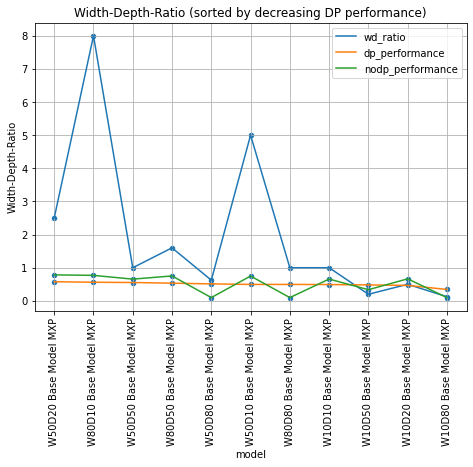

In [9]:
# Disscusion - width-depth-ratio comparison
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])

# sort values
selected_df = selected_df.sort_values("dp_performance", ascending=False)

# reset_index() because we use the model as index for df
selected_df.reset_index().plot.scatter("model", "wd_ratio", ax=axis, rot=90)
selected_df.reset_index().plot("model", "wd_ratio", ax=axis, rot=90)
selected_df.reset_index().plot.scatter("model", "dp_performance", ax=axis, rot=90)
selected_df.reset_index().plot("model", "dp_performance", ax=axis, rot=90)
selected_df.reset_index().plot.scatter("model", "nodp_performance", ax=axis, rot=90)
selected_df.reset_index().plot("model", "nodp_performance", ax=axis, rot=90)

axis.set_title("Width-Depth-Ratio (sorted by decreasing DP performance)")
axis.set_ylabel("Width-Depth-Ratio")

plt.grid()

In [9]:
# temp for residual model
selected_df = selected_df[selected_df["width"]!=12]

In [51]:
# temp
selected_df = base_models_MXP

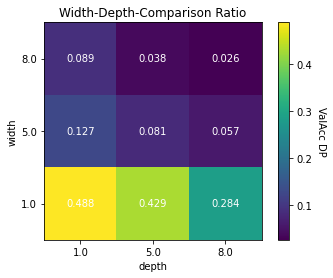

In [10]:
# selected_df.sort_values("width")[selected_df["width"]==selected_df["width"][0]].reset_index()["dp_performance"]
selected_hm_df = selected_df.sort_values("width", ascending=False).sort_values("depth", ascending=True)

width_factors = selected_hm_df["width"].unique().tolist()
# set depth factors to the width with the least depth factors
depth_factors = np.arange(100)
for wf in width_factors: 
    arr = selected_hm_df[selected_hm_df["width"]==wf]["depth"].unique().tolist()
    if len(arr)<len(depth_factors):
        depth_factors = arr

selected_hm_df.index = pd.MultiIndex.from_arrays(selected_hm_df[['width', 'depth']].values.T, names=['width', 'depth'])
wd_heatmap = []
for width in width_factors: 
    row = []
    for depth in depth_factors: 
        row.append(
            selected_hm_df["dp_performance"][width, depth]/(selected_hm_df["size"][width, depth]/100)
        )
    wd_heatmap.append(row)
wd_heatmap = np.array(wd_heatmap)

fig, ax = plt.subplots()
im = ax.imshow(wd_heatmap)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("ValAcc DP", rotation=-90, va="bottom")

for y in range(wd_heatmap.shape[0]):
    for x in range(wd_heatmap.shape[1]):
        plt.text(
            x, y, '%.3f' % wd_heatmap[y, x],
            horizontalalignment='center',
            verticalalignment='center',
            color='white',
        )

# Show all ticks and label them with the respective list entries
ax.set_xlabel("depth")
ax.set_xticks(np.arange(len(depth_factors)))
ax.set_xticklabels([str(depth) for depth in depth_factors])

ax.set_ylabel("width")
ax.set_yticks(np.arange(len(width_factors)))
ax.set_yticklabels([str(width) for width in width_factors])

ax.set_title("Width-Depth-Comparison Ratio")
fig.savefig('figures/heatmap_dense_model_noDP.pdf', bbox_inches='tight') if save_figures else plt.show()

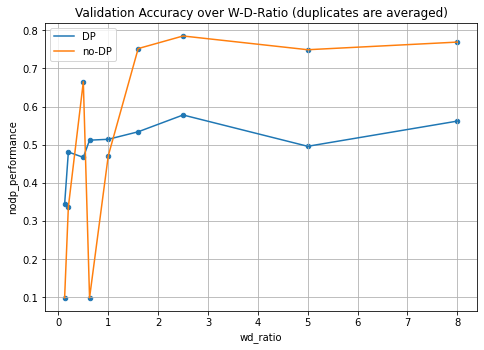

In [11]:
import re

# Disscusion - width-depth-ratio comparison
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])

# sort values
selected_df = selected_df.sort_values("wd_ratio", ascending=False)

# reset_index() because we use the model as index for df
selected_df.groupby('wd_ratio').mean().reset_index().plot.scatter("wd_ratio", "dp_performance", ax=axis)
selected_df.groupby('wd_ratio').mean().reset_index().plot("wd_ratio", "dp_performance", ax=axis, label="DP")

# reset_index() because we use the model as index for df
selected_df.groupby('wd_ratio').mean().reset_index().plot.scatter("wd_ratio", "nodp_performance", ax=axis)
selected_df.groupby('wd_ratio').mean().reset_index().plot("wd_ratio", "nodp_performance", ax=axis, label="no-DP")
axis.set_title("Validation Accuracy over W-D-Ratio (duplicates are averaged)")
plt.grid()

## Performance Evaluation 
Including raw DP-performance, DP-/noDP-ratio analysis.

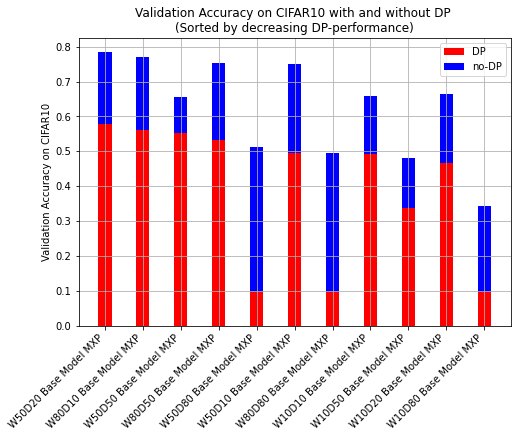

In [12]:
# Plot Nr. 2 - Bar Plot DP/no-DP SOTA performances

# order based on decreasing DP performance
new_dp_performances = selected_df.sort_values("dp_performance", ascending=False)["dp_performance"]
new_nodp_perfomances = selected_df.sort_values("dp_performance", ascending=False)["nodp_performance"]
new_model_names = selected_df.sort_values("dp_performance", ascending=False).index

# calculate difference for plot
diff_nodp_dp = new_nodp_perfomances-new_dp_performances
#assert((diff_nodp_dp<0).sum()==0)

width = 0.35
fig = plt.figure(figsize=(21, 7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(new_model_names, new_dp_performances, width, color='r')
axis.bar(new_model_names, diff_nodp_dp, width, bottom=new_dp_performances, color='b')
axis.set_ylabel('Validation Accuracy on CIFAR10')   
axis.set_title('Validation Accuracy on CIFAR10 with and without DP \n(Sorted by decreasing DP-performance)')

plt.xticks(rotation=90 if select_all else 45, ha="right")
axis.legend(labels=['DP', 'no-DP'])
plt.grid()

fig.savefig('figures/valacc_dp_nodp_bar.pdf', bbox_inches='tight') if save_figures else plt.show()

DP performance mean: 50.15454545454545 and std: 6.029075556510776


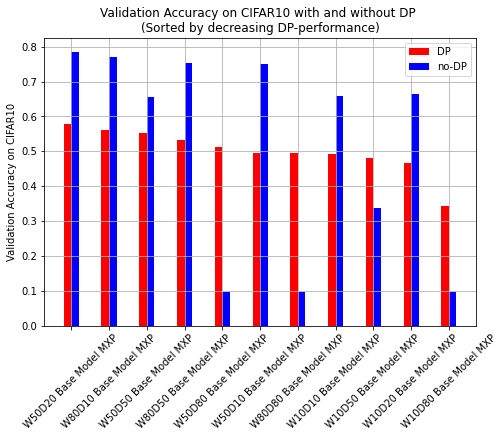

In [13]:
import pandas as pd
# Plot Nr. 2 - Bar Plot DP/no-DP SOTA performances [VERSION 2]

# order based on decreasing DP performance
new_dp_performances = selected_df.sort_values("dp_performance", ascending=False)["dp_performance"]
new_nodp_perfomances = selected_df.sort_values("dp_performance", ascending=False)["nodp_performance"]

new_dp_GGN = selected_df.sort_values("dp_performance", ascending=False)["dp_GGN"]
new_nodp_GGN = selected_df.sort_values("dp_performance", ascending=False)["nodp_GGN"]

new_model_names = selected_df.sort_values("dp_performance", ascending=False).index

print(f"DP performance mean: {dp_performances.mean()*100} and std: {dp_performances.std()*100}")

width = 0.2
x_axis = np.arange(len(selected_df))

fig = plt.figure(figsize=(21,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(x_axis-width/2, new_dp_performances, width, label="DP", color='r')
axis.bar(x_axis+width/2, new_nodp_perfomances, width, label="no-DP", color='b')
axis.set_ylabel('Validation Accuracy on CIFAR10')
axis.set_title('Validation Accuracy on CIFAR10 with and without DP \n(Sorted by decreasing DP-performance)')

plt.xticks(x_axis, new_model_names, rotation=90 if select_all else 45)
plt.legend()
plt.grid()

fig.savefig('figures/valacc_dp_nodp_bar.pdf', bbox_inches='tight') if save_figures else plt.show()

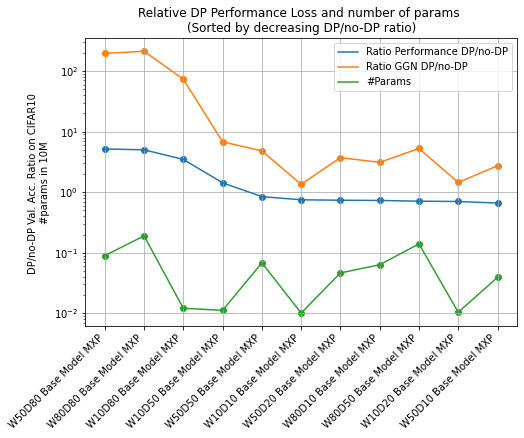

In [14]:
# Plot Nr. 3 

# TODO: we could also think about plotting the relation to the #params for each 
# architecture type separately (e.g. ResNet18, ResNet50, ResNet152, etc.)

# order based on decreasing DP/no-DP ratio
selected_df["dp_nodp_ratio"] = selected_df["dp_performance"]/selected_df["nodp_performance"]
selected_df["dp_nodp_ratio_GGNs"] = selected_df["dp_GGN"]/selected_df["nodp_GGN"]

ratio_dp_nodp = selected_df.sort_values("dp_nodp_ratio", ascending=False)["dp_nodp_ratio"]
new_model_sizes = selected_df.sort_values("dp_nodp_ratio", ascending=False)["size"]
new_model_names = selected_df.sort_values("dp_nodp_ratio", ascending=False).index

new_scale_dp_nodp_GGNs = selected_df.sort_values("dp_nodp_ratio", ascending=False)["dp_nodp_ratio_GGNs"]

width = 0.35
fig = plt.figure(figsize=(21,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])

axis.scatter(new_model_names, ratio_dp_nodp)
axis.plot(new_model_names, ratio_dp_nodp, label="Ratio Performance DP/no-DP")

axis.scatter(new_model_names, new_scale_dp_nodp_GGNs)
axis.plot(new_model_names, new_scale_dp_nodp_GGNs, label="Ratio GGN DP/no-DP")

axis.scatter(new_model_names, new_model_sizes/10000)
axis.plot(new_model_names, new_model_sizes/10000, label="#Params")

axis.set_ylabel('DP/no-DP Val. Acc. Ratio on CIFAR10 \n#params in 10M')
axis.set_title('Relative DP Performance Loss and number of params \n(Sorted by decreasing DP/no-DP ratio)')

plt.legend()
plt.grid()
plt.yscale("log")
plt.xticks(rotation=90 if select_all else 45, ha="right")

fig.savefig('figures/valacc_dp_nodp_ratio_line.pdf', bbox_inches='tight') if save_figures else plt.show()

## Gradient Graphs
Could be used to reveil more information about the GGN with and without DP for different SOTA models.<br>
Easy variant compared to following section. 

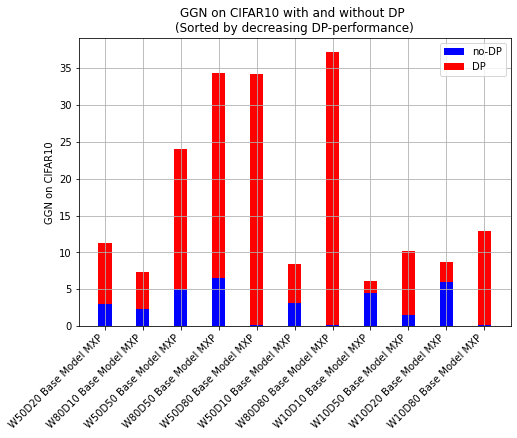

In [15]:
# TODO: think about normalizing with #params as absolute GGNs are larger for many params (higher dim)
# Figure 1 - GGN Value DP and non-DP as part of it

# order based on decreasing DP performance (to be able to compare better with above Plot Nr. 2)
new_dp_performances = selected_df.sort_values("dp_performance", ascending=False)["dp_performance"]
new_nodp_perfomances = selected_df.sort_values("dp_performance", ascending=False)["nodp_performance"]
new_dp_GGNs = selected_df.sort_values("dp_performance", ascending=False)["dp_GGN"]
new_nodp_GGNs = selected_df.sort_values("dp_performance", ascending=False)["nodp_GGN"]
new_model_names = selected_df.sort_values("dp_performance", ascending=False).index

# calculate difference for plot
diff_nodp_dp = new_nodp_perfomances-new_dp_performances
diff_dp_nodp_GGNs = new_dp_GGNs-new_nodp_GGNs

width = 0.35
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(new_model_names, new_nodp_GGNs, width, color='b', label="no-DP")
axis.bar(new_model_names, diff_dp_nodp_GGNs, width, bottom=new_nodp_GGNs, color='r', label="DP")
axis.set_ylabel('GGN on CIFAR10')
axis.set_title('GGN on CIFAR10 with and without DP \n(Sorted by decreasing DP-performance)')

plt.xticks(rotation=90 if select_all else 45, ha="right")
axis.legend()
plt.grid()
plt.show()

fig.savefig('figures/ggn_dp_nodp_bar.pdf', bbox_inches='tight') if save_figures else plt.show()

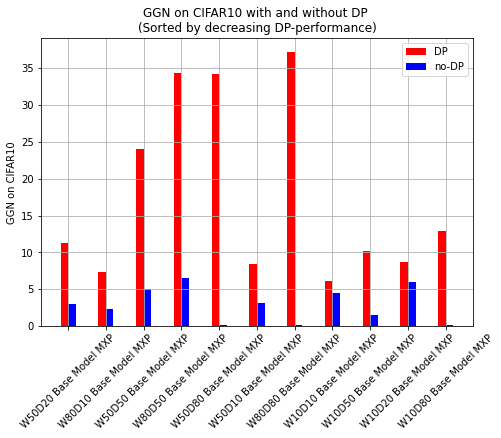

In [16]:
# Figure 1 - GGN Value DP and non-DP as part of it [VERSION 2]

# order based on decreasing DP performance (to be able to compare better with above Plot Nr. 2)
new_dp_performances = selected_df.sort_values("dp_performance", ascending=False)["dp_performance"]
new_nodp_perfomances = selected_df.sort_values("dp_performance", ascending=False)["nodp_performance"]
new_dp_GGNs = selected_df.sort_values("dp_performance", ascending=False)["dp_GGN"]
new_nodp_GGNs = selected_df.sort_values("dp_performance", ascending=False)["nodp_GGN"]
new_model_names = selected_df.sort_values("dp_performance", ascending=False).index

width = 0.2
x_axis = np.arange(len(selected_df))

fig = plt.figure(figsize=(21,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(x_axis-width/2, new_dp_GGNs, width, label="DP", color='r')
axis.bar(x_axis+width/2, new_nodp_GGNs, width, label="no-DP", color='b')
axis.set_ylabel('GGN on CIFAR10')
axis.set_title('GGN on CIFAR10 with and without DP \n(Sorted by decreasing DP-performance)')

plt.xticks(x_axis, new_model_names, rotation=90 if select_all else 45)
plt.legend()
plt.grid()

fig.savefig('figures/ggn_dp_nodp_bar.pdf', bbox_inches='tight') if save_figures else plt.show()

DP/-noDP GGN ratio: model
W80D10 Base Model MXP      3.112772
W50D10 Base Model MXP      2.731945
W50D20 Base Model MXP      3.719379
W80D50 Base Model MXP      5.268588
W50D50 Base Model MXP      4.805146
W80D80 Base Model MXP    212.742857
W10D10 Base Model MXP      1.348528
W50D80 Base Model MXP    195.491429
W10D20 Base Model MXP      1.447290
W10D50 Base Model MXP      6.793355
W10D80 Base Model MXP     73.465909
Name: dp_nodp_ratio_GGNs, dtype: float64
DP/-noDP GGN ratio mean: 4644.792723095112%
DP/-noDP GGN ratio std: 8079.235686906483%


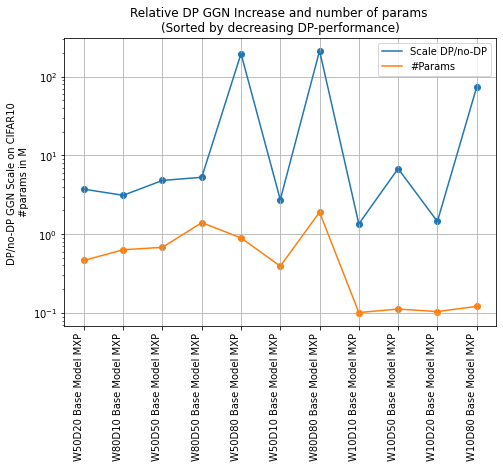

In [17]:
# Figure 2 - GGN DP/-no-DP Scale Factor and ordered by highest scale factor
# Plot Nr. 3 

# TODO: we could also think about plotting the relation to the #params for each 
# architecture type separately (e.g. ResNet18, ResNet50, ResNet152, etc.)

selected_df["dp_nodp_ratio"] = selected_df["dp_performance"]/selected_df["nodp_performance"]
selected_df["dp_nodp_ratio_GGNs"] = selected_df["dp_GGN"]/selected_df["nodp_GGN"]

print(f"DP/-noDP GGN ratio: {selected_df['dp_nodp_ratio_GGNs']}")
print(f"DP/-noDP GGN ratio mean: {selected_df['dp_nodp_ratio_GGNs'].mean()*100}%")
print(f"DP/-noDP GGN ratio std: {selected_df['dp_nodp_ratio_GGNs'].std()*100}%")

# dec_dp_ratio_indices = (-ratio_dp_nodp).argsort()
# dec_dp_scale_indices = (-scale_dp_nodp_GGNs).argsort()
# NOTE: currently sorted by decreasing DP-Performance

# order based on decreasing DP performance (to be able to compare better with above Plot Nr. 2)
new_scale_dp_nodp_GGNs = selected_df.sort_values("dp_performance", ascending=False)["dp_nodp_ratio_GGNs"]
new_model_sizes = selected_df.sort_values("dp_performance", ascending=False)["size"]
new_model_names = selected_df.sort_values("dp_performance", ascending=False).index

width = 0.35
fig = plt.figure(figsize=(21,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])

axis.scatter(new_model_names, new_scale_dp_nodp_GGNs)
axis.plot(new_model_names, new_scale_dp_nodp_GGNs, label="Scale DP/no-DP")

axis.scatter(new_model_names, new_model_sizes/1000)
axis.plot(new_model_names, new_model_sizes/1000, label="#Params")

axis.set_ylabel('DP/no-DP GGN Scale on CIFAR10 \n#params in M')
axis.set_title('Relative DP GGN Increase and number of params \n(Sorted by decreasing DP-performance)')

plt.legend()
plt.grid()
plt.yscale("log")
plt.xticks(rotation=90 if select_all else 90, ha="right")

fig.savefig('figures/ggn_dp_nodp_scale_line.pdf', bbox_inches='tight') if save_figures else plt.show()

## Search Param Graphs
Graphs based on "optimal" L2 clip norms and number of epochs.
Specific questions to answer: 
* Is it better to train longer (with more noise) or shorter (with less noise)? Does this depend on the size of the model?
* What relation does the "optimal" L2-clip norm have with the number of params and the GGN (in the DP case and in the non-DP case)?
* Is the L2 clip norm correlated with the number of epochs? (here it's hard to tell whether any direct causality exists, as more likely both are linked to the number of params)?
* Are there any patterns of different model architectures having similar L2-clips or Epochs (comparison apart from just looking at the number of params)?

FileNotFoundError: [Errno 2] No such file or directory: 'figures/l2_histogram.pdf'

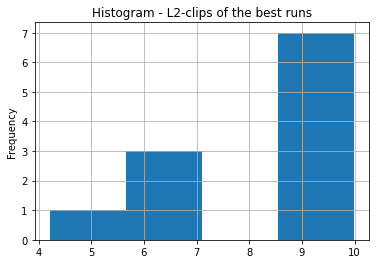

In [18]:
# Figure 1a - Probability Distributions based on optimal params - L2-, Epoch-Histograms 
# NOTE: Could think about a more sophisticated probabilistic modelling

selected_df["best_L2"].plot.hist(
    title="Histogram - L2-clips of the best runs",
    rot=0, 
    bins=4,
)
plt.grid()
plt.savefig('figures/l2_histogram.pdf', bbox_inches='tight')

# Figure 1b - same for num of epochs
selected_df["best_epoch"].value_counts().plot.bar(
    # with .plot otherwise this is plotted directly into the previous plot
    figure=plt.figure(), 
    title="Histogram - Number of epochs of the best runs",
    ylabel="Number of runs",
    xlabel="epochs",
    rot=0, 
)
plt.grid()
plt.savefig('figures/epoch_histogram.pdf', bbox_inches='tight')


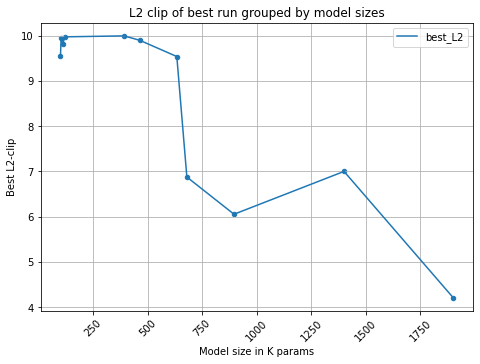

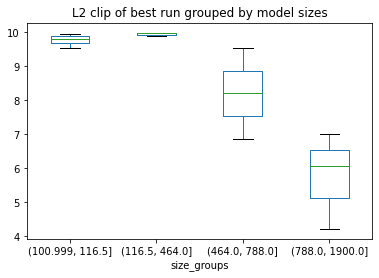

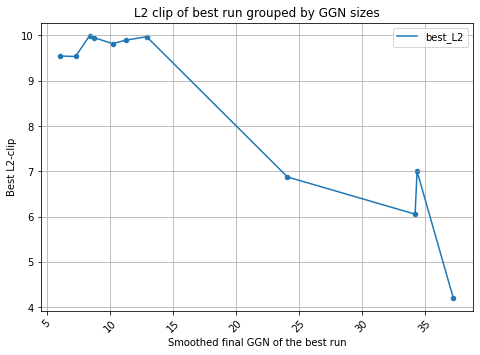

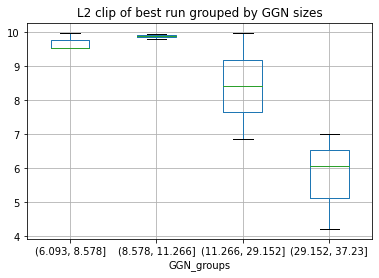

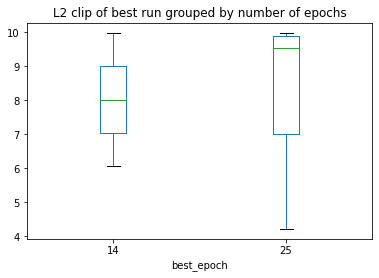

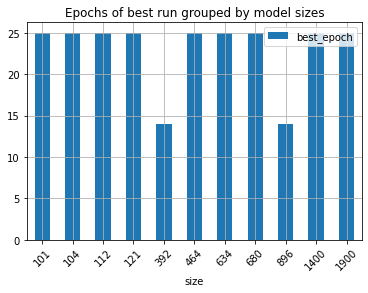

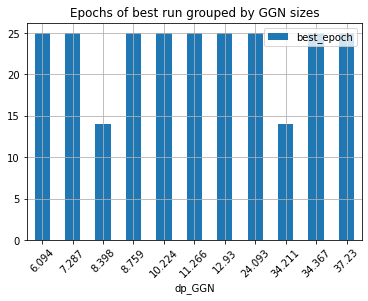

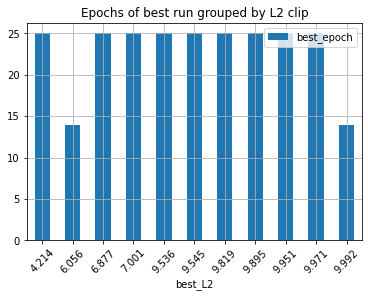

In [19]:
# Figure 2 - L2-, Epoch-Histograms for different clusters: box-plots 
# grouped by num-param-buckets, GGN-buckts, or all "wide"/"deep"/"small"/"big" manual models, L2-buckets, Epoch-buckets

# index arrays based on wanted groups 
# NOTE: check boxplot details here: 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot

# L2
# 1. group by num params
title="L2 clip of best run grouped by model sizes"
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
# line plot 
selected_df.sort_values("size").plot("size", "best_L2", ax=axis)
selected_df.sort_values("size").plot.scatter("size", "best_L2", rot=45, ax=axis)
# plt.xscale("log")
plt.ylabel("Best L2-clip")
plt.xlabel("Model size in K params")
plt.title(title)
plt.grid()
plt.savefig('figures/l2_over_size.pdf', bbox_inches='tight') if save_figures else plt.show()

# box plot - split in 4 groups
selected_df["size_groups"] = pd.qcut(selected_df["size"], 4)
selected_df.boxplot(column="best_L2", by="size_groups")
# in order to change the title
plt.title(title)
plt.suptitle("")
plt.grid()

# 2. group by ggn
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
title="L2 clip of best run grouped by GGN sizes"
# line plot 
selected_df.sort_values("dp_GGN").plot.scatter("dp_GGN", "best_L2", ax=axis)
selected_df.sort_values("dp_GGN").plot("dp_GGN", "best_L2", ax=axis, rot=45, title=title)
plt.ylabel("Best L2-clip")
plt.xlabel("Smoothed final GGN of the best run")
plt.grid()
plt.savefig('figures/l2_over_ggn.pdf', bbox_inches='tight') if save_figures else plt.show()

# box plot - split in 4 groups
selected_df["GGN_groups"] = pd.qcut(selected_df["dp_GGN"], 4)
selected_df.boxplot(column="best_L2", by="GGN_groups")
# in order to change the title
plt.title(title)
plt.suptitle("")

# 3. group by epochs
title="L2 clip of best run grouped by number of epochs"
# box plot 
selected_df.boxplot(column="best_L2", by="best_epoch")
# in order to change the title
plt.title(title)
plt.suptitle("")
plt.grid()
plt.savefig('figures/l2_over_epoch.pdf', bbox_inches='tight') if save_figures else plt.show()

# Epochs
# 1. group by num params
title="Epochs of best run grouped by model sizes"
selected_df.sort_values("size").plot.bar("size", "best_epoch", rot=45, title=title)
plt.grid()

# 2. group by ggn
title="Epochs of best run grouped by GGN sizes"
selected_df.sort_values("dp_GGN").plot.bar("dp_GGN", "best_epoch", rot=45, title=title)
plt.grid()

# 3. group by L2
title="Epochs of best run grouped by L2 clip"
selected_df.sort_values("best_L2").plot.bar("best_L2", "best_epoch", rot=45, title=title)
plt.grid()

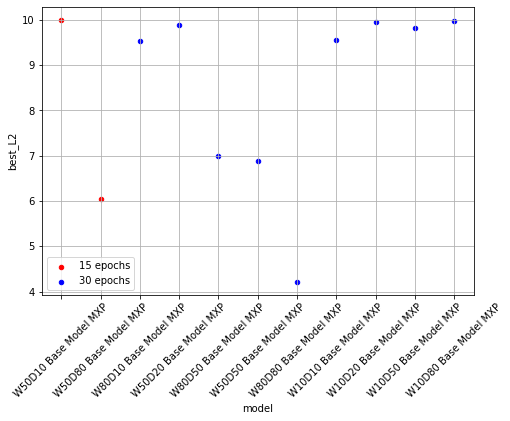

In [20]:
# Figure 3 - Clustering of model architectures based on optimal L2 and Epochs
# NOTE: think about doing kNNs and visualizing clusters
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])

# pass in axis to plot on the same figure
selected_df[selected_df["best_epoch"]==14].reset_index().plot.scatter(
    "model", "best_L2", ax=axis, color="r", label="15 epochs", rot=90 if select_all else 45)
selected_df[selected_df["best_epoch"]==25].reset_index().plot.scatter(
    "model", "best_L2", ax=axis, color="b", label="30 epochs", rot=90 if select_all else 45)
plt.grid()

## Experimental

DP performance mean: 50.15454545454545 and std: 6.029075556510776


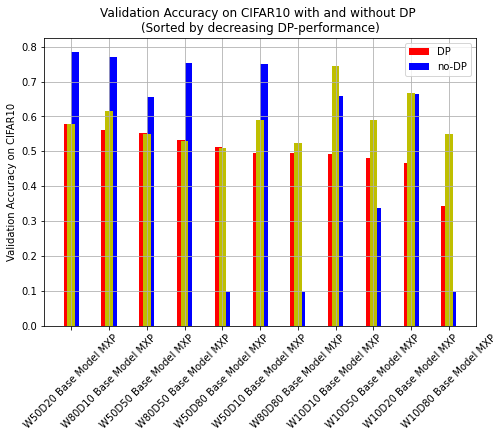

In [21]:
import pandas as pd
# Plot Nr. 2 - Bar Plot DP/no-DP SOTA performances [VERSION 2]

# order based on decreasing DP performance
new_dp_performances = selected_df.sort_values("dp_performance", ascending=False)["dp_performance"]
new_nodp_perfomances = selected_df.sort_values("dp_performance", ascending=False)["nodp_performance"]

new_dp_GGN = selected_df.sort_values("dp_performance", ascending=False)["dp_GGN"]
new_nodp_GGN = selected_df.sort_values("dp_performance", ascending=False)["nodp_GGN"]

new_model_names = selected_df.sort_values("dp_performance", ascending=False).index

print(f"DP performance mean: {dp_performances.mean()*100} and std: {dp_performances.std()*100}")

width = 0.2
x_axis = np.arange(len(selected_df))

# hypothesis that the dp performance is proportional to the nodp-perf
# by factor of the trainability measured by the GGN increase non-related to the #params.
# Ewm for smoothening and sigmoid for squashing to compensate for noisy training. 
# dp-perf ~ (GGN_dp - GGN_nodp)/sqrt(#params) * nodp-perf
alpha = 0.75
sigmoid = lambda x: 1/(1 + np.exp(-x))
special_hypothesis = sigmoid(
        pd.Series(
        np.sqrt(len(new_dp_GGN))/(new_dp_GGN-new_nodp_GGN)*new_nodp_perfomances
    ).ewm(alpha=alpha).mean()
)

fig = plt.figure(figsize=(12,6)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(x_axis-width/2, new_dp_performances, width, label="DP", color='r')
axis.bar(x_axis+width/2, new_nodp_perfomances, width, label="no-DP", color='b')
axis.bar(x_axis,  special_hypothesis, width, color='y')
axis.set_ylabel('Validation Accuracy on CIFAR10')
axis.set_title('Validation Accuracy on CIFAR10 with and without DP \n(Sorted by decreasing DP-performance)')

plt.xticks(x_axis, new_model_names, rotation=90 if select_all else 45)
plt.legend()
plt.grid()
plt.show()

# Filter Visualization Experiments
This section visualizes and compares the filters.

In [32]:
# hacky way of import 'get_model' without creating a module (could also do that)
import sys, os
sys.path.append(os.path.join(os.curdir, '..', '/lean/models'))
from models import get_model

In [59]:
t = torch.load(state_dict_path)

In [66]:
a = [("2", 1)] for i in range(3)
a

SyntaxError: invalid syntax (<ipython-input-66-8bf70fd3066c>, line 1)

In [70]:
import wandb
import torch
from collections import OrderedDict
from opacus.validators import ModuleValidator

# restore the model
model = get_model(
        model_name="resnet18", 
        pretrained=False, 
        num_classes=10, 
        data_name="imagenette", 
        kernel_size=3,
        conv_layers=[16, 32], 
        nr_stages=1,
        depth=5.0, 
        width=8.0, 
        halve_dim=True, 
        after_conv_fc_str="mxp_gn", 
        activation_fc_str="selu",
        skip_depth=2,
        dense=True,
        dsc=False,
    )
if not ModuleValidator.is_valid(model):
    model = ModuleValidator.fix(model)

# download and get path with 'name' attribute
state_dict_path = wandb.restore('model.pt', run_path="niware/dp_benchmark/cavk2uqv").name

# load in state_dict and remove '_module' from key name
state_dict = torch.load(state_dict_path)
parsed_state_dict = OrderedDict(
    [
        (".".join(key.split(".")[1:]), value)
        for key, value in state_dict.items()
    ] 
)
# load in weights into model
model.load_state_dict(parsed_state_dict) 

# NOTE: not necessarily 
model.eval() 

ResNet(
  (features): Sequential(
    (init_block): ResInitBlock(
      (conv): ConvBlock(
        (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn): GroupNorm(8, 64, eps=1e-05, affine=True)
        (activ): ReLU(inplace=True)
      )
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (stage1): Sequential(
      (unit1): ResUnit(
        (body): ResBlock(
          (conv1): ConvBlock(
            (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): GroupNorm(8, 64, eps=1e-05, affine=True)
            (activ): ReLU(inplace=True)
          )
          (conv2): ConvBlock(
            (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): GroupNorm(8, 64, eps=1e-05, affine=True)
          )
        )
        (activ): ReLU(inplace=True)
      )
      (unit2): ResUnit(
        (body): ResBlock(
    

In [ ]:
# 1. difference between DP and no-DP filters along the layer depth


In [71]:
# 2. filter visualization for deep and shallow filters w/ and w/o DP
import numpy as np
import matplotlib.pyplot as plt
from torchvision import utils

def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
        n,c,w,h = tensor.shape

        if allkernels: tensor = tensor.view(n*c, -1, w, h)
        elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

        rows = np.min((tensor.shape[0] // nrow + 1, 64))    
        grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
        plt.figure( figsize=(nrow,rows) )
        plt.imshow(grid.numpy().transpose((1, 2, 0)))

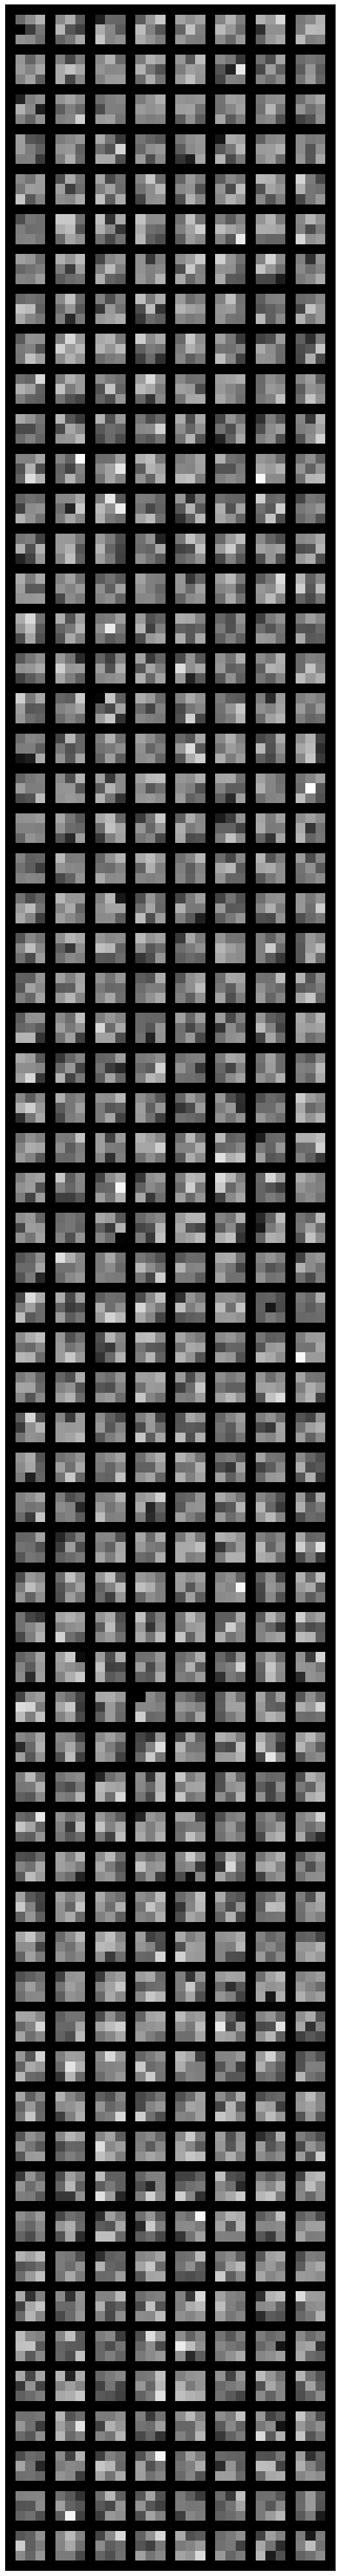

In [75]:
# load in model 
layer = 1
filter = model.features.stage4.unit1.body.conv1.conv.weight.data.clone()
visTensor(filter, ch=0, allkernels=False)

plt.axis('off')
plt.ioff()
plt.show()

In [80]:
import sys, os
sys.path.append(os.path.join(os.curdir, 'pytorch-cnn-visualizations/src'))
from cnn_layer_visualization import CNNLayerVisualization

from torchvision import models

cnn_layer = 17
filter_pos = 5
# Fully connected layer is not needed
pretrained_model = models.vgg16(pretrained=True).features
layer_vis = CNNLayerVisualization(pretrained_model, cnn_layer, filter_pos)

# Layer visualization with pytorch hooks
layer_vis.visualise_layer_with_hooks()

# Layer visualization without pytorch hooks
# layer_vis.visualise_layer_without_hooks()

TypeError: 'ResNet' object is not iterable

In [ ]:
# 3. filter visualization for comparison narrow vs wide models


# Advanced Smoothness Plots
Based on the visual, qualitative smoothness evaluation of the loss landscape in the NIPS paper "How Does Batch Normalization Help Optimization?" by Santurkar et al., NIPS 2018. 

In [64]:
# Figure 1 - Loss Landscape


In [14]:
# Figure 2 - Gradient Predictiveness


In [91]:
# Figure 3 - Effective Beta-Smoothness